In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [28]:
df=pd.read_csv("D:/Semester5Project/og.csv",low_memory=False)

In [29]:
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
1,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
2,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
3,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0
4,59.166.0.0,32119,149.171.126.9,111,udp,CON,0.078339,568,312,31,...,0,2,4,2,3,1,1,2,NaN,0


In [34]:
df.isnull().any()

srcip               False
sport               False
dstip               False
dsport              False
proto               False
state               False
dur                 False
sbytes              False
dbytes              False
sttl                False
dttl                False
sloss               False
dloss               False
service             False
Sload               False
Dload               False
Spkts               False
Dpkts               False
swin                False
dwin                False
stcpb               False
dtcpb               False
smeansz             False
dmeansz             False
trans_depth         False
res_bdy_len         False
Sjit                False
Djit                False
Stime               False
Ltime               False
Sintpkt             False
Dintpkt             False
tcprtt              False
synack              False
ackdat              False
is_sm_ips_ports     False
ct_state_ttl        False
ct_flw_http_mthd     True
is_ftp_login

In [30]:
df.drop(index=df[df.duplicated()].index,inplace=True)

In [6]:
for i in df.select_dtypes(exclude=np.number).columns:
    print(i,df[i].str.isspace().any())

srcip False
sport False
dstip False
dsport False
proto False
state False
service False
ct_ftp_cmd True
attack_cat False


In [7]:
df['ct_ftp_cmd'].value_counts()

     1014165
0    1005477
1      38853
2        263
4        250
3        206
5        105
6         91
8          3
Name: ct_ftp_cmd, dtype: int64

In [31]:
indexes=[]
for i,j in df['ct_ftp_cmd'].str.isspace().items():
    if(j==True):
        indexes.append(i)
df['ct_ftp_cmd'].loc[indexes]=np.nan

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [10]:
df['ct_ftp_cmd'].value_counts(dropna=False)

NaN    1014165
0      1005477
1        38853
2          263
4          250
3          206
5          105
6           91
8            3
Name: ct_ftp_cmd, dtype: int64

Dropping the IP Addresses as they are not useful (and attack_cat)

In [32]:
df.drop(columns=['srcip','dstip','attack_cat'],inplace=True)

In [33]:
df=df.replace('-',np.nan)

In [34]:
df['sport']=df['sport'].apply(lambda x: '12' if x=='0x000c' else x)
df['sport']=df['sport'].apply(lambda x: '11' if x=='0x000b' else x)
df['sport']=df['sport'].astype('float64')

In [35]:
df['dsport']=df['dsport'].apply(lambda x: '52233' if x=='0xcc09' else x)
df['dsport']=df['dsport'].apply(lambda x: '49320' if x=='0xc0a8' else x)
df['dsport']=df['dsport'].apply(lambda x: np.nan if x=='0x20205321' else x)
df['dsport']=df['dsport'].astype('float64')

In [36]:
df['ct_ftp_cmd']=df['ct_ftp_cmd'].astype(int)

In [37]:
df.select_dtypes(exclude=np.number)

,proto,state,service,ct_ftp_cmd
0,udp,CON,NaN,0
1,udp,CON,dns,0
2,udp,CON,dns,0
3,udp,CON,dns,0
4,udp,CON,NaN,0
...,...,...,...,...
2540035,tcp,CON,http,NaN
2540037,tcp,CON,NaN,NaN
2540038,tcp,FIN,ftp-data,NaN
2540041,tcp,CON,http,NaN


In [102]:
df['ct_ftp_cmd']=df['ct_ftp_cmd'].astype(float)

In [40]:
dummies=pd.get_dummies(df[['proto','state','service']])

In [41]:
df.drop(columns=['proto','state','service'],inplace=True)

In [45]:
df=pd.concat([df,dummies],axis=1)

In [46]:
df.shape

(2059413, 206)

In [47]:
dfcorr=df.corr()

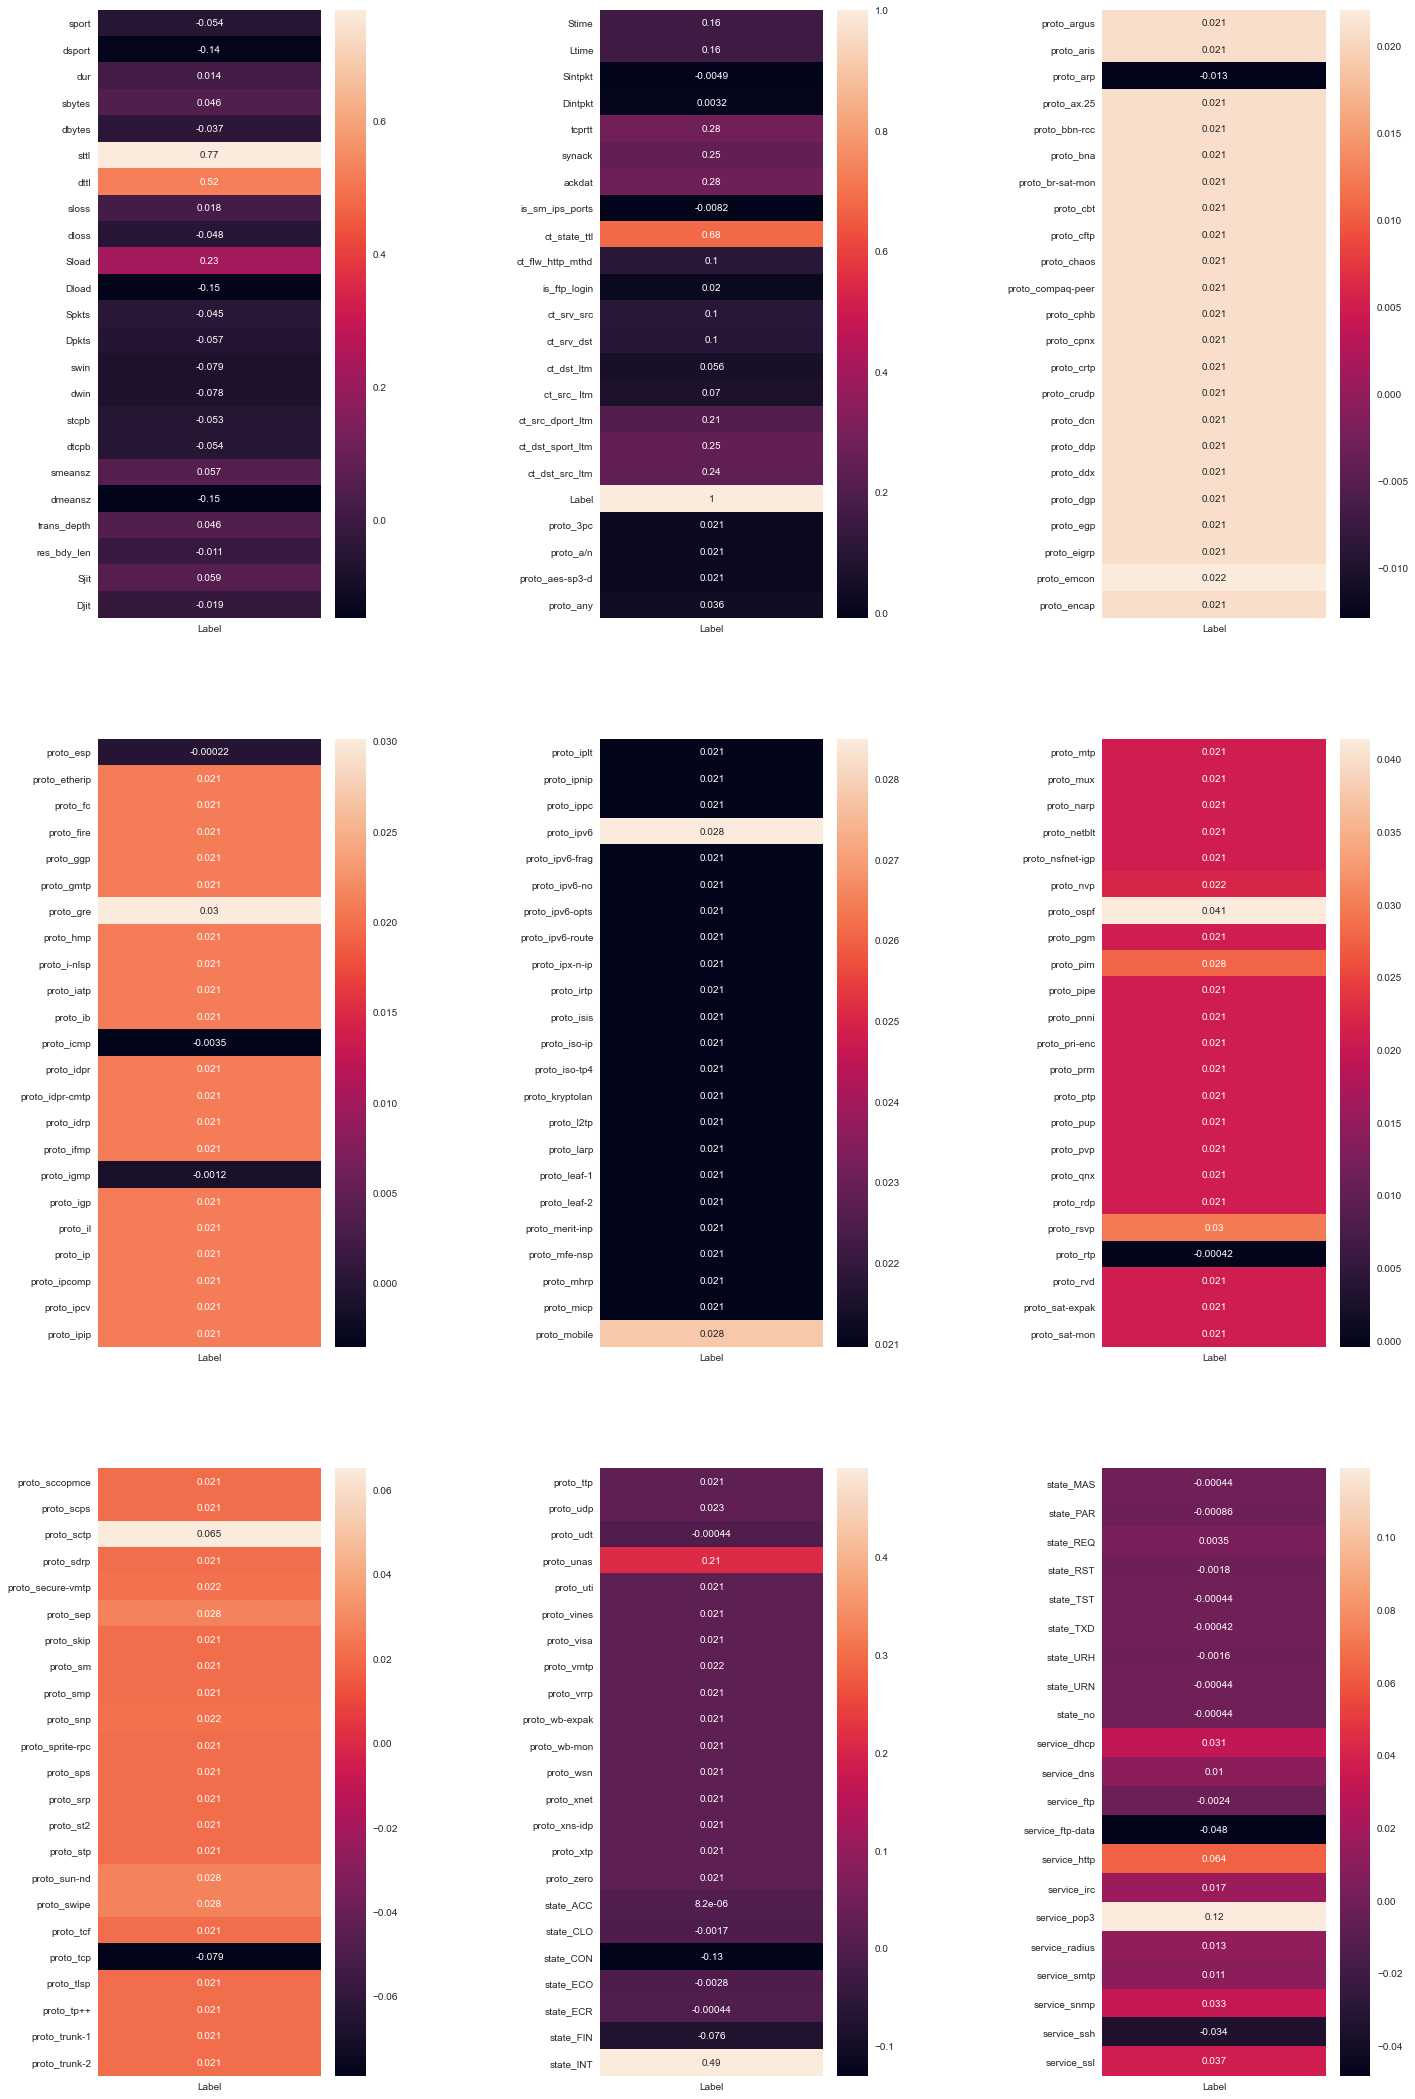

In [88]:
plt.style.use('seaborn')
fig, axes = plt.subplots(3, 3, figsize=(23, 38))
sns.heatmap(pd.DataFrame(dfcorr['Label'][0:23]),annot=True,ax=axes[0][0])
sns.heatmap(pd.DataFrame(dfcorr['Label'][23:46]),annot=True,ax=axes[0][1])
sns.heatmap(pd.DataFrame(dfcorr['Label'][46:69]),annot=True,ax=axes[0][2])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
sns.heatmap(pd.DataFrame(dfcorr['Label'][69:92]),annot=True,ax=axes[1][0])
sns.heatmap(pd.DataFrame(dfcorr['Label'][92:115]),annot=True,ax=axes[1][1])
sns.heatmap(pd.DataFrame(dfcorr['Label'][115:138]),annot=True,ax=axes[1][2])
sns.heatmap(pd.DataFrame(dfcorr['Label'][138:161]),annot=True,ax=axes[2][0])
sns.heatmap(pd.DataFrame(dfcorr['Label'][161:184]),annot=True,ax=axes[2][1])
sns.heatmap(pd.DataFrame(dfcorr['Label'][184:]),annot=True,ax=axes[2][2])
fig.savefig('correlations.jpg')

In [89]:
dfvar=df.var()

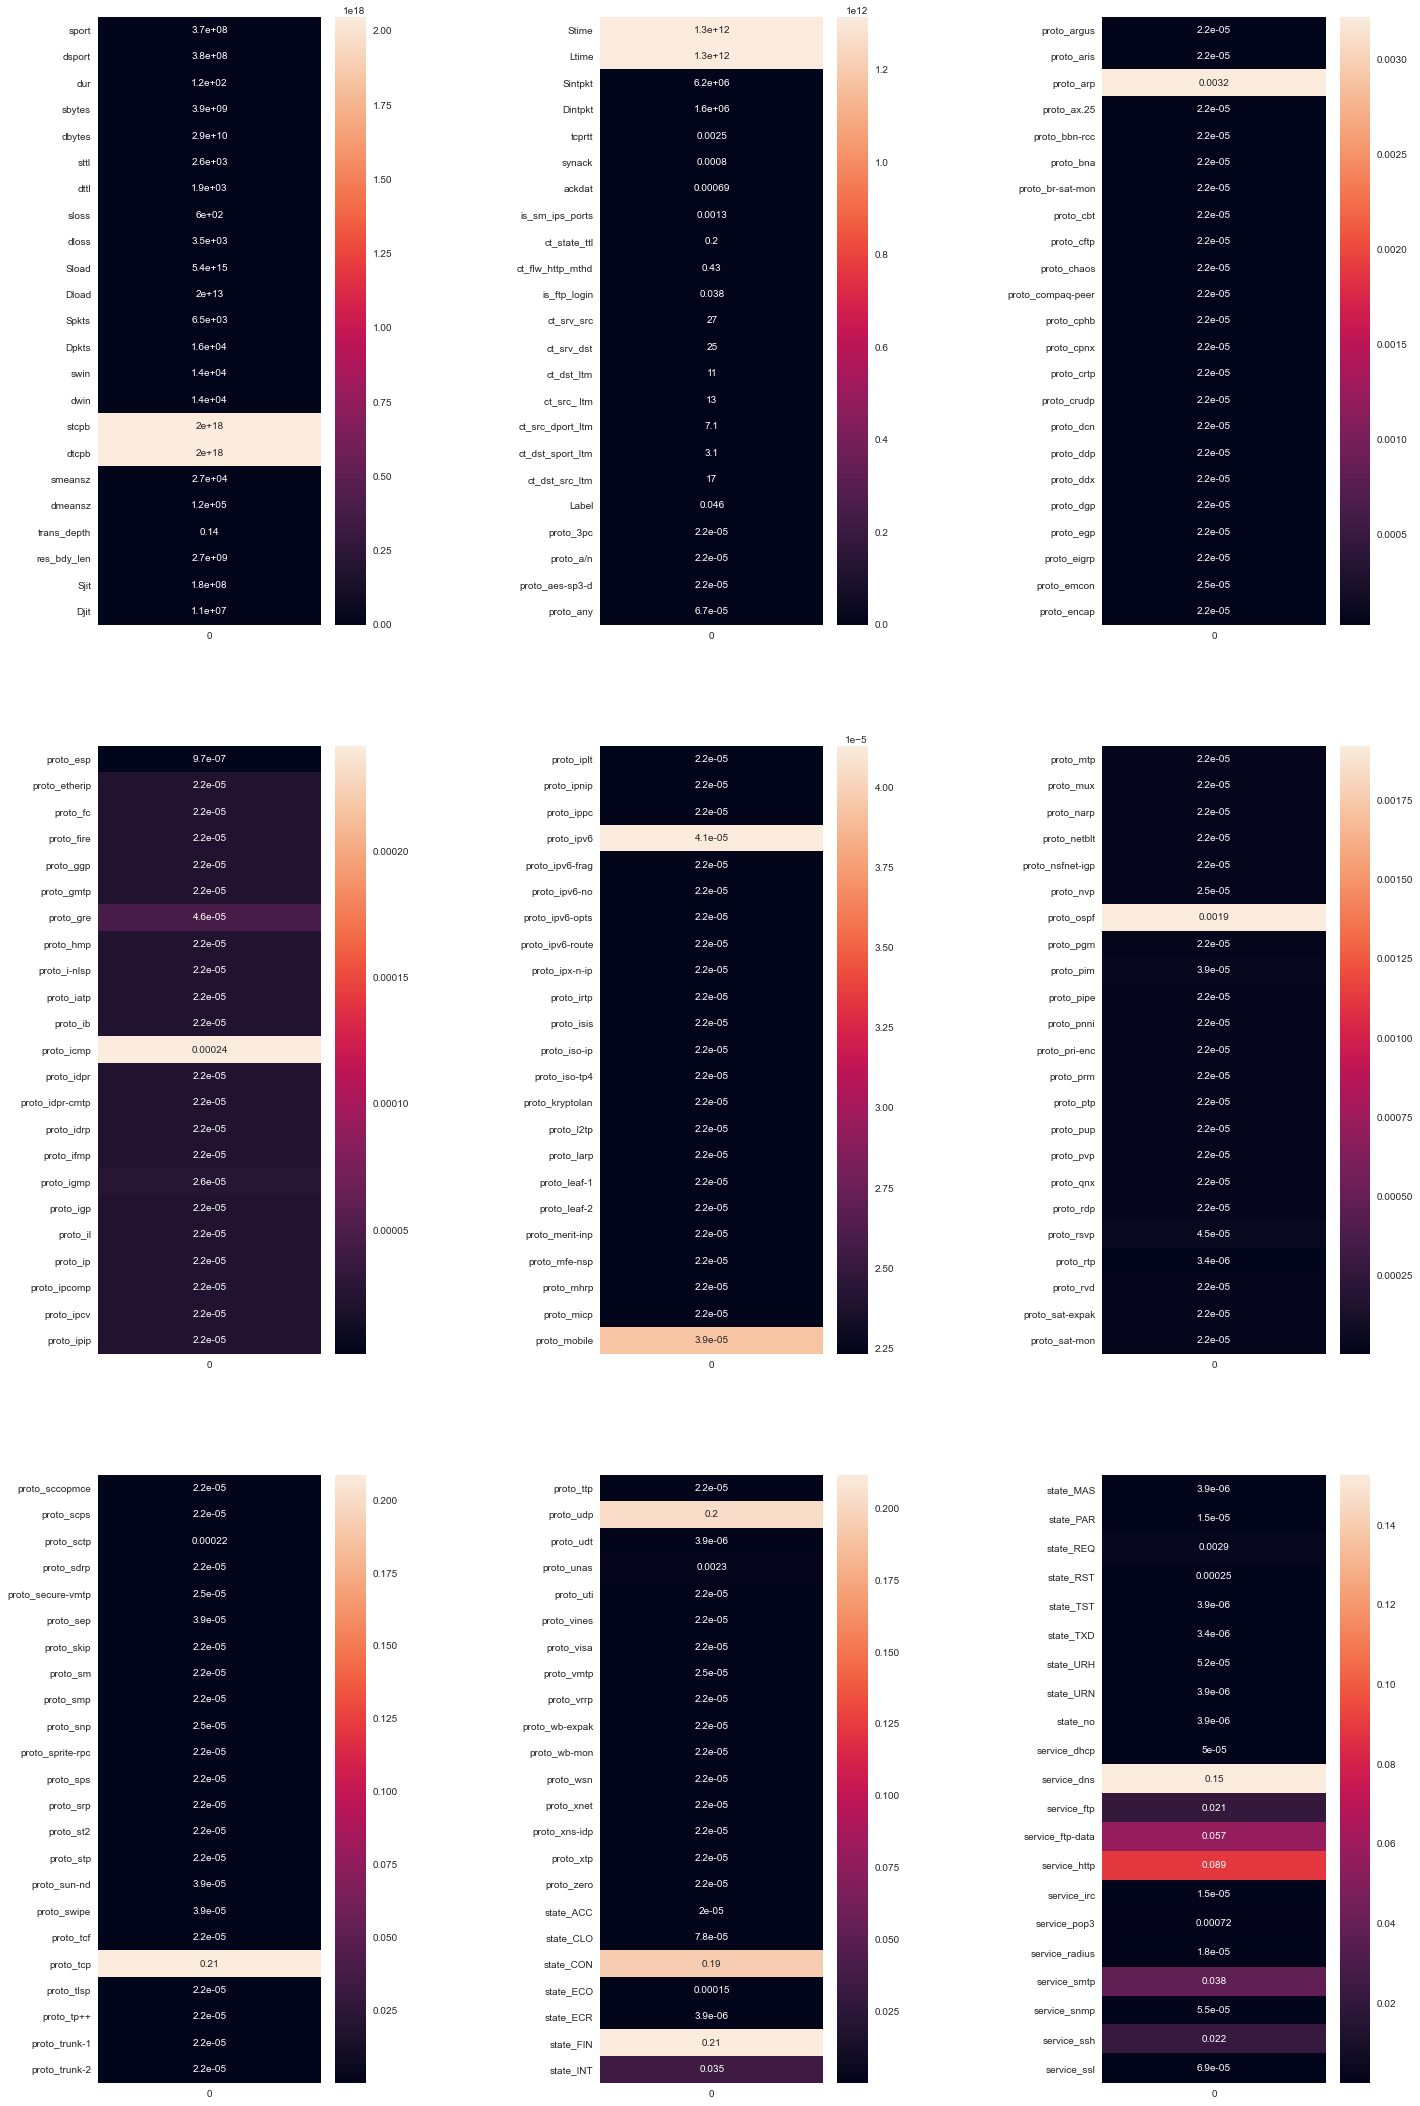

In [92]:
plt.style.use('seaborn')
fig, axes = plt.subplots(3, 3, figsize=(23, 38))
sns.heatmap(pd.DataFrame(dfvar[0:23]),annot=True,ax=axes[0][0])
sns.heatmap(pd.DataFrame(dfvar[23:46]),annot=True,ax=axes[0][1])
sns.heatmap(pd.DataFrame(dfvar[46:69]),annot=True,ax=axes[0][2])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
sns.heatmap(pd.DataFrame(dfvar[69:92]),annot=True,ax=axes[1][0])
sns.heatmap(pd.DataFrame(dfvar[92:115]),annot=True,ax=axes[1][1])
sns.heatmap(pd.DataFrame(dfvar[115:138]),annot=True,ax=axes[1][2])
sns.heatmap(pd.DataFrame(dfvar[138:161]),annot=True,ax=axes[2][0])
sns.heatmap(pd.DataFrame(dfvar[161:184]),annot=True,ax=axes[2][1])
sns.heatmap(pd.DataFrame(dfvar[184:]),annot=True,ax=axes[2][2])
fig.savefig('variances.jpg')

In [ ]:
plt.style.use('seaborn')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.8, hspace=None)
fig, axes = plt.subplots(103, 2, figsize=(38, 23))
for i in range(103):
    for j in range(2):
        sns.boxplot(df[np.array(df.columns).reshape(103,2)[i][j]],ax=axes[i][j])
fig.savefig('boxplots.jpg')